In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tsla_2014_2023.csv to tsla_2014_2023.csv


In [ ]:
df = pd.read_csv("tsla_2014_2023.csv")

In [ ]:
df.dropna(inplace=True)

In [ ]:
feature_cols = df.columns.difference(['date', 'next_day_close'])
X = df[feature_cols]
y = df['next_day_close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 13.84
MAE: 10.67
R² Score: 0.94


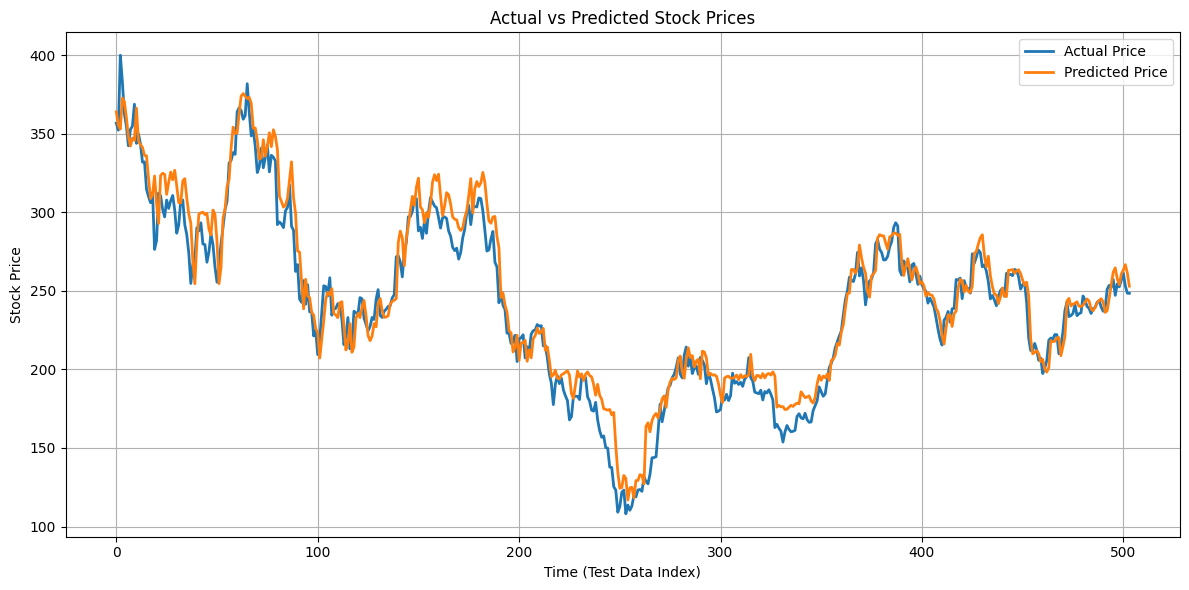

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(y_pred, label='Predicted Price', linewidth=2)
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time (Test Data Index)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
